In [ ]:



























import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Reading the dataset
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


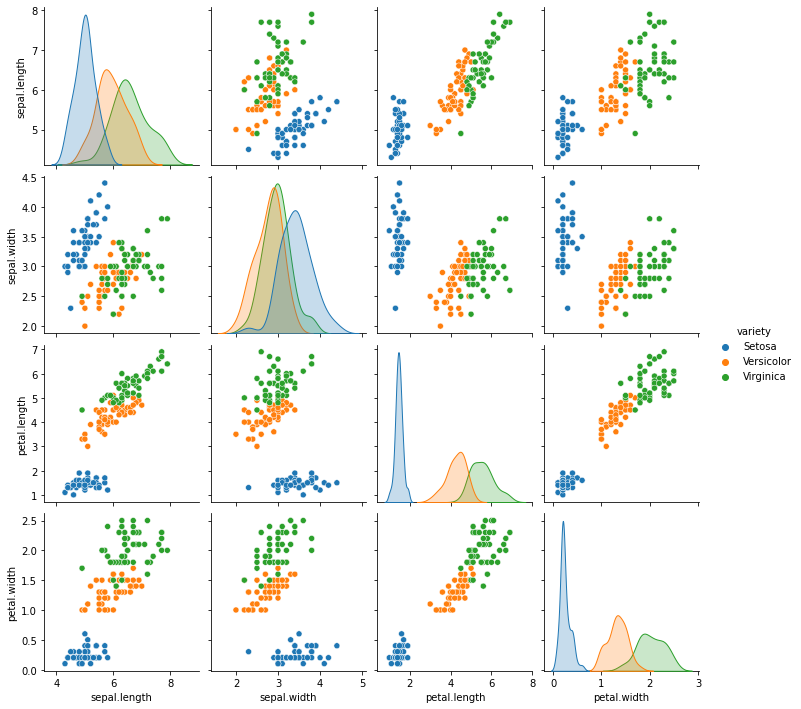

In [ ]:
import seaborn as sns
sns.pairplot(df,hue="variety")

<h6> 1. Dropping two columns [petal length sepal width] </h6>

In [ ]:
df = df.drop(columns=["sepal.width","petal.length"])

In [ ]:
df.head()

,sepal.length,petal.width,variety
0,5.1,0.2,Setosa
1,4.9,0.2,Setosa
2,4.7,0.2,Setosa
3,4.6,0.2,Setosa
4,5.0,0.2,Setosa


In [ ]:
df["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

#### One Hot Encoding
Setosa->1
Virginica->0
Versicolor->2

In [ ]:
def mapp(x):
  if x=="Setosa":
    return [0,1,0]
  elif x=="Virginica":
    return [1,0,0]
  else:
    return [0,0,1]

In [ ]:
df["variety"] = df["variety"].apply(lambda x: mapp(x))

In [ ]:
df = df.sample(frac=1)

In [ ]:
X  = df.drop(columns=["variety"])

In [ ]:
y = df["variety"]

In [ ]:
df = df.reset_index()

In [ ]:
X = X.drop(columns=["index"])

In [ ]:
X.head()

,sepal.length,petal.width
0,5.7,1.3
1,6.2,1.8
2,5.2,0.2
3,6.4,2.3
4,5.2,1.4


<h3> Constructing a Single Layer Perceptron Model <h3>
<h5> SoftMax Activation function </h5>

In [ ]:
import math as m
class PerceptronClassifier:
  '''
  Single Layer Perceptron Model for Binary Classification
  Loss Function: Squared Error-> Convex Function
  GD Type: Stochastic Gradient Descent
  '''

  def __init__(self,X,y,w_0,w_1,w_2,epochs=10,lr=0.01):
    '''
    args:
    X: Independent Features
    y: Dependedn Features
    w_0,w_1,w_2: Weight vector of class 0 and class 1 class 2
    epochs: no of epochs to be trained default 10
    lr: Learning rate by default 0.01
    return: None
   '''
    self.X = X
    self.y = y
    self.w_0 = np.array(w_0)
    self.w_1 = np.array(w_1)
    self.w_2 = np.array(w_2)
    self.epochs=epochs
    self.lr = lr

  def fit(self):
    '''
    Funtion to fit the data points on the fiven data points
    args: None
    return: None
    '''
    for eps in range(1,(self.epochs)+1):
      loss = 0
      for ind_x in range(len(self.X)):
        
        summation = m.exp(np.matmul(self.w_0,self.X[ind_x]))+m.exp(np.matmul(self.w_1,self.X[ind_x]))+m.exp(np.matmul(self.w_2,self.X[ind_x]))
        summation = round(summation,3)
        pred =  np.array([m.exp(np.matmul(self.w_0,self.X[ind_x]))/summation,m.exp(np.matmul(self.w_1,self.X[ind_x]))/summation,m.exp(np.matmul(self.w_2,self.X[ind_x]))/summation])
        if pred.argmax()!=np.array(self.y[ind_x]).argmax():
          loss+=1
        yhat = []
        for i in range(len(self.y[ind_x])):
          if i==pred.argmax():
            yhat.append(1)
          else:
            yhat.append(0)
        #print(yhat)
        grad_0 = (round((summation*m.exp(np.matmul(self.w_0,self.X[ind_x]))-1),3)/(summation**2))*(self.w_0)
        grad_1 = (round((summation*m.exp(np.matmul(self.w_1,self.X[ind_x]))-1),3)/(summation**2))*(self.w_1)
        grad_2 = (round((summation*m.exp(np.matmul(self.w_2,self.X[ind_x]))-1),3)/(summation**2))*(self.w_2)

        self.w_0 = (self.w_0 - self.lr * (self.y[ind_x][0]-yhat[0])*(grad_0))%
        self.w_1 = (self.w_1 - self.lr * (self.y[ind_x][1]-yhat[1])*(grad_1))
        self.w_2 = (self.w_2 - self.lr * (self.y[ind_x][2]-yhat[2])*(grad_2))
      print("Epochs:",eps,"Loss:",loss)
      print("w_0:",self.w_0)
      print("w_1:",self.w_1)
      print("w_2:",self.w_2)
      print("------------------x--------------------\n")

  def predict(self,X_test):
    '''
    Function To predict yhat given X
    args:
    X_test: Array of Data Points
    return: Vector of y predicted
    '''
    yhat = []
    for ind_x in range(len(X_test)):
      pred = np.matmul(self.w,self.X[ind_x])
      if pred>0:
        yhat.append(1)
      else:
        yhat.append(0)
    
    return yhat
  
  def accuracy(self,y,yhat):
    '''
    Function to calculate accuarcy
    args:
    y: actual y values
    yhat: predicted y values
    return: scalar float value 
    '''
    cnt = 0
    for i in range(len(y)):
      if y[i]==yhat[i]:
        cnt+=1
    
    return round(cnt/len(y),3)
  

In [ ]:
X["bias"] = [1 for i in range(len(X))]

In [ ]:
X = X[["bias","sepal.length","petal.width"]]

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train  = np.array(y_train)
y_test = np.array(y_test)

#### Model Building

In [ ]:
y_train[0][1]

0

In [ ]:
model = PerceptronClassifier(X_train,y_train,[0.5,-0.5,0.5],[-0.5,0.5,0.5],[0.5,0.5,-0.5],20)

In [ ]:
model.fit()

Epochs: 1 Loss: 114
w_0: [ 0.5 -0.5  0.5]
w_1: [-0.775  0.775  0.775]
w_2: [ 0.556  0.556 -0.556]
------------------x--------------------

Epochs: 2 Loss: 77
w_0: [ 0.5 -0.5  0.5]
w_1: [-1.635  1.635  1.635]
w_2: [ 0.55  0.55 -0.55]
------------------x--------------------

Epochs: 3 Loss: 77
w_0: [ 0.5 -0.5  0.5]
w_1: [-3.518  3.518  3.518]
w_2: [ 0.55  0.55 -0.55]
------------------x--------------------

Epochs: 4 Loss: 77
w_0: [ 0.5 -0.5  0.5]
w_1: [-7.565  7.565  7.565]
w_2: [ 0.55  0.55 -0.55]
------------------x--------------------

Epochs: 5 Loss: 77
w_0: [ 0.5 -0.5  0.5]
w_1: [-16.275  16.275  16.275]
w_2: [ 0.55  0.55 -0.55]
------------------x--------------------

Epochs: 6 Loss: 77
w_0: [ 0.5 -0.5  0.5]
w_1: [-35.023  35.023  35.023]
w_2: [ 0.55  0.55 -0.55]
------------------x--------------------



OverflowError: ignored

In [ ]:
yhat = model.predict(X_test)

In [ ]:
model.accuracy(yhat,y_test)

0.5

In [ ]:
yhat_train = model.predict(X_train)

In [ ]:
model.accuracy(yhat_train,y_train)

1.0